In [25]:
!pip3 install opencv-python

In [163]:
import matplotlib.pyplot as plt
from pathlib import Path

In [130]:
from PIL import Image
import numpy as np
import cv2

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt2.xml')
img = cv2.imread('drag3/2.jpg')
# Make a copy of the original image to draw face detections on
image_copy = np.copy(img)

# Convert the image to gray 
gray_image = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

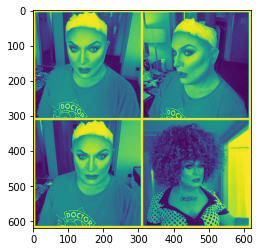

In [131]:
plt.imshow(gray_image)

In [132]:
faces = face_cascade.detectMultiScale(gray_image, 1.05, 6, minSize=[80,80], flags=cv2.CASCADE_SCALE_IMAGE)

In [133]:
# Print number of faces found
print('Number of faces detected:', len(faces))

Number of faces detected: 4


In [134]:
faces

array([[103, 368, 127, 127],
       [ 80,  62, 127, 127],
       [416, 413,  90,  90],
       [363,  77, 113, 113]], dtype=int32)

In [127]:
image_copy[0:100,:,:].shape

(100, 620, 3)

In [148]:
padding = 25

crops = []

# Draw rectangle around the faces
for count,face in enumerate(faces):
    x, y, w, h = face
    left = x - padding
    right = x+w+padding
    top = y - padding
    bottom = y+h+padding
    crop = image_copy[left:right,top:bottom]
    crops.append({'img':crop,'weight':x+y})
    
crops.sort(key=lambda x: x['weight'])

<ipython-input-170-33dc91fa2231>:7: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(len(crops) / columns + 1, columns, i + 1)


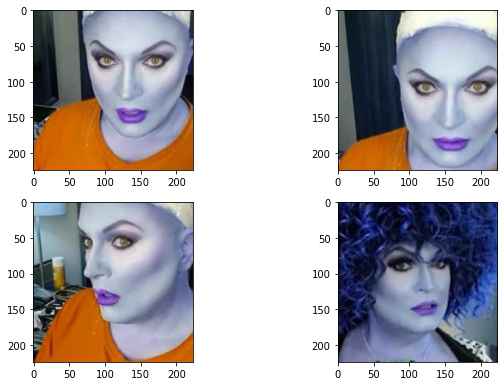

In [170]:
plt.figure(figsize=(10,10))
columns = 2
target_size=(224,224)
target_base_path=r'./split'

for i, im in enumerate(crops):
    plt.subplot(len(crops) / columns + 1, columns, i + 1)
    resized = cv2.resize(im['img'], target_size, interpolation = cv2.INTER_AREA)
    plt.imshow(resized)
    filename = f'{target_base_path}/{i+1}.jpg'
    cv2.imwrite(filename, resized)
    